#### First Steps

- Analyze Home vs Away games by venue
    - split the data by Season and Playoffs
        - generate two comparisons
        
- Data required:
    - game.csv
    - team_info.csv
    - game_teams_stats.csv

In [244]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [245]:
# Load necessary data

game = pd.read_csv('/home/jovyan/Project/game.csv')
teamInfo = pd.read_csv('/home/jovyan/Project/team_info.csv')
gameTeamStats = pd.read_csv('/home/jovyan/Project/game_teams_stats.csv')

In [7]:
# See head of data
game.head()

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
1,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
3,2011030224,20112012,P,2012-05-06,2012-05-06T23:30:00Z,4,1,2,4,home win REG,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
4,2011030225,20112012,P,2012-05-08,2012-05-08T23:30:00Z,1,4,3,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT


In [8]:
teamInfo.head()

,team_id,franchiseId,shortName,teamName,abbreviation,link
0,1,23,New Jersey,Devils,NJD,/api/v1/teams/1
1,4,16,Philadelphia,Flyers,PHI,/api/v1/teams/4
2,26,14,Los Angeles,Kings,LAK,/api/v1/teams/26
3,14,31,Tampa Bay,Lightning,TBL,/api/v1/teams/14
4,6,6,Boston,Bruins,BOS,/api/v1/teams/6


In [9]:
gameTeamStats.head()

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2011030221,1,away,False,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7
1,2011030221,4,home,True,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4
2,2011030222,1,away,True,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7
3,2011030222,4,home,False,REG,Peter Laviolette,1,20,24,32,5,0,49.1,9,6
4,2011030223,4,away,False,OT,Peter Laviolette,3,28,28,4,5,1,50.8,2,1


First need to split the data by Regular Season and Playoff.


In [14]:
#Playoffs 
gamePlayoffs = game[game['type'] == 'P']
#gamePlayoffs.head()

#Regular Season
gameRegular = game[game['type'] == 'R']
#gameRegular.head()


#### Question 1:

By venue, does a Home Team have a higher probability of winning due to being familiar with the venue?
By venue, seperate venues into individual bins, and calculate away_goals and home_goals be venue and plot using a histogram/rugplot. 

In [54]:
# Playoffs

#Sort by venue
gamePlayoffs.sort_values('venue', inplace= True)

In [192]:
p_home_goals = gamePlayoffs.groupby('venue').home_goals.aggregate(lambda x : sum(x))
p_away_goals = gamePlayoffs.groupby('venue').away_goals.aggregate(lambda x : sum(x))

#reset index
p_home_goals['venue'] = p_home_goals.index
p_away_goals['venue'] = p_away_goals.index

p_home_goals = p_home_goals.reset_index()
p_away_goals = p_away_goals.reset_index()

#drop index-row 48
p_home_goals.drop([48], inplace=True)
p_away_goals.drop([48], inplace=True)

#### Preliminary Plots

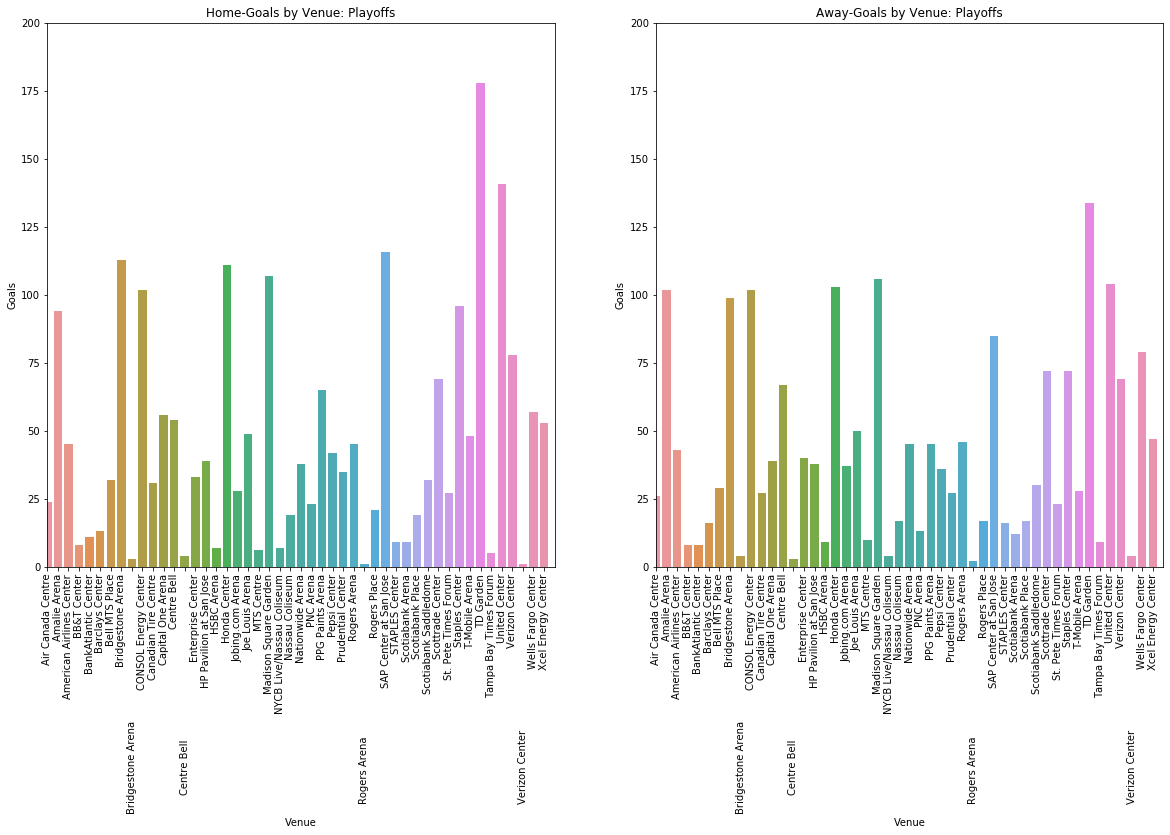

In [243]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))

# Home-Goals
obs = len(p_home_goals)
ticks_p_home = p_home_goals.loc[:, 'venue']

ax0 = sns.barplot(data=p_home_goals, x= 'venue', y='home_goals', ax=ax[0])
# Set x/y limits and labels
ax0.set_xticklabels(ticks_p_home, rotation=90)
ax0.set_xlim(0, obs)
ax0.set_ylim(0,200)
ax0.set_xlabel("Venue")
ax0.set_ylabel("Goals")
ax0.set_title("Home-Goals by Venue: Playoffs");

# Away-Goals
obs = len(p_away_goals)
ticks_p_home = p_away_goals.loc[:, 'venue']

ax1 = sns.barplot(data=p_away_goals, x= 'venue', y='away_goals', ax=ax[1])
# Set x/y limits and labels
ax1.set_xticklabels(ticks_p_home, rotation=90)
ax1.set_xlim(0, obs)
ax1.set_ylim(0,200)
ax1.set_xlabel("Venue")
ax1.set_ylabel("Goals")
ax1.set_title("Away-Goals by Venue: Playoffs");

fig.show()



In [250]:
# Season
#Sort by venue
gameRegular.sort_values('venue', inplace= True)

In [257]:
r_home_goals = gameRegular.groupby('venue').home_goals.aggregate(lambda x : sum(x))
r_away_goals = gameRegular.groupby('venue').away_goals.aggregate(lambda x : sum(x))

#reset index
r_home_goals['venue'] = r_home_goals.index
r_away_goals['venue'] = r_away_goals.index

r_home_goals = r_home_goals.reset_index()
r_away_goals = r_away_goals.reset_index()

#drop index-row 48
r_home_goals.drop([78], inplace=True)
r_away_goals.drop([78], inplace=True)

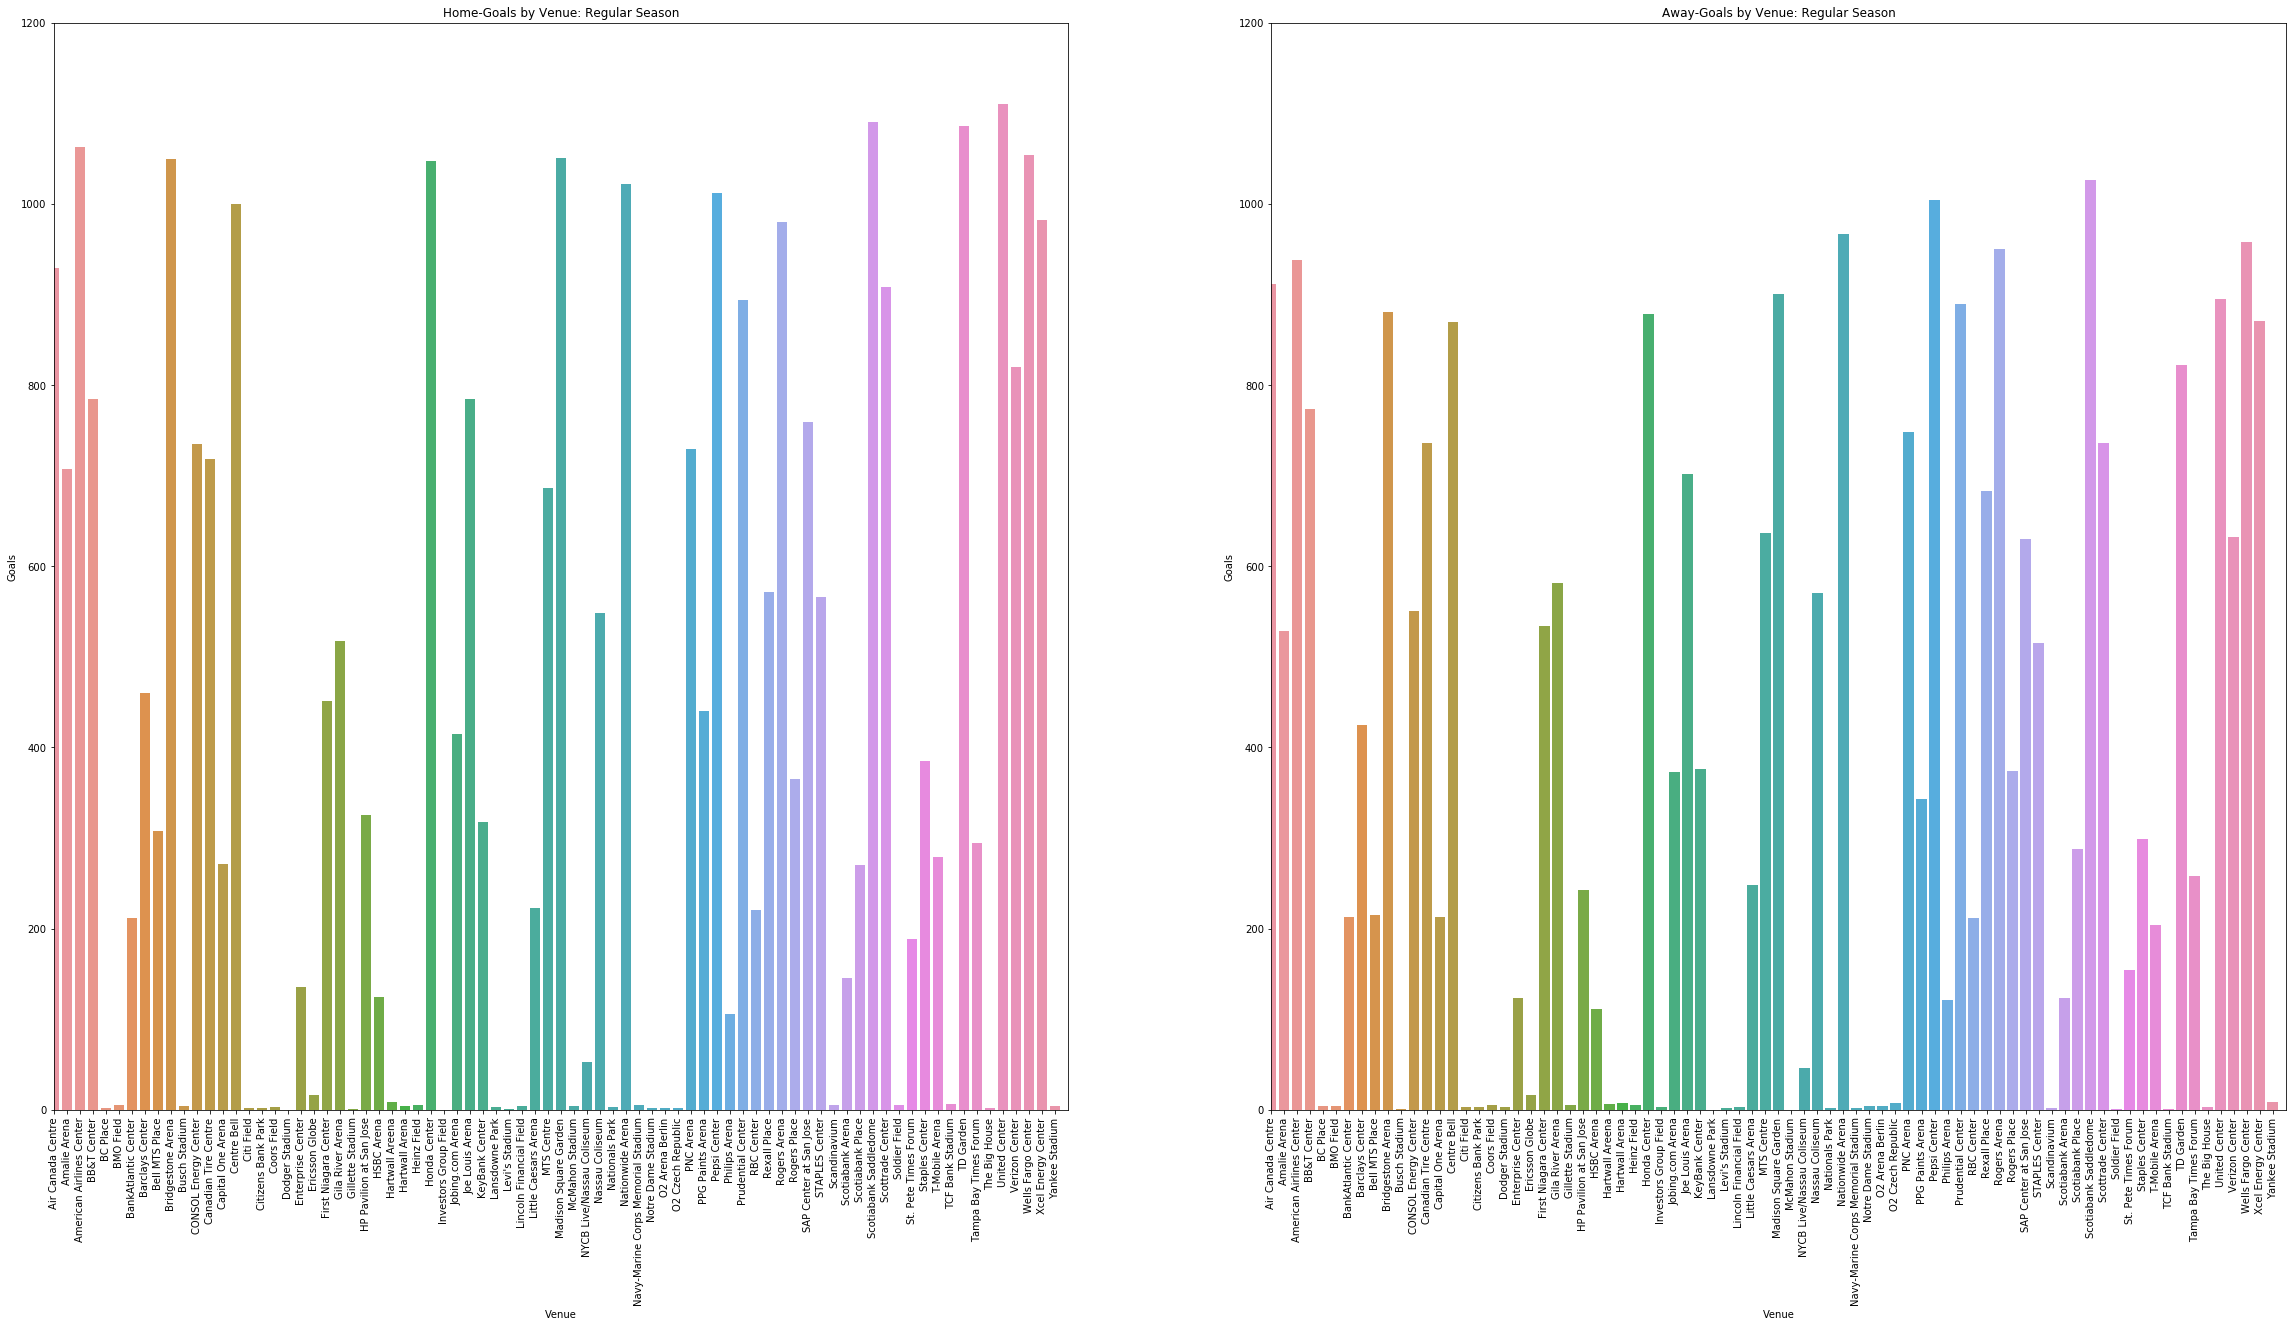

In [269]:
fig, ax = plt.subplots(1, 2, figsize=(40,20))

# Home-Goals
obs = len(r_home_goals)
ticks_r_home = r_home_goals.loc[:, 'venue']

ax0 = sns.barplot(data=r_home_goals, x= 'venue', y='home_goals', ax=ax[0])
# Set x/y limits and labels
ax0.set_xticklabels(ticks_r_home, rotation=90)
ax0.set_xlim(0, obs)
ax0.set_ylim(0,1200)
ax0.set_xlabel("Venue")
ax0.set_ylabel("Goals")
ax0.set_title("Home-Goals by Venue: Regular Season");

# Away-Goals
obs = len(r_away_goals)
ticks_r_home = r_away_goals.loc[:, 'venue']

ax1 = sns.barplot(data=r_away_goals, x= 'venue', y='away_goals', ax=ax[1])
# Set x/y limits and labels
ax1.set_xticklabels(ticks_r_home, rotation=90)
ax1.set_xlim(0, obs)
ax1.set_ylim(0,1200)
ax1.set_xlabel("Venue")
ax1.set_ylabel("Goals")
ax1.set_title("Away-Goals by Venue: Regular Season");

fig.show()
